In [1]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data is collected.

In [9]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/thermodynamics/density/hydrogen.csv')
expdata_df

,Temperature (K),Pressure (bar),Density (kg/m3)
0,298.15,1,0.081272
1,298.15,11,0.888770
2,298.15,21,1.686800
3,298.15,21,1.686800
4,298.15,21,1.686800
...,...,...,...
98,298.15,961,48.226000
99,298.15,971,48.536000
100,298.15,981,48.844000
101,298.15,991,49.149000


<Figure size 640x480 with 0 Axes>

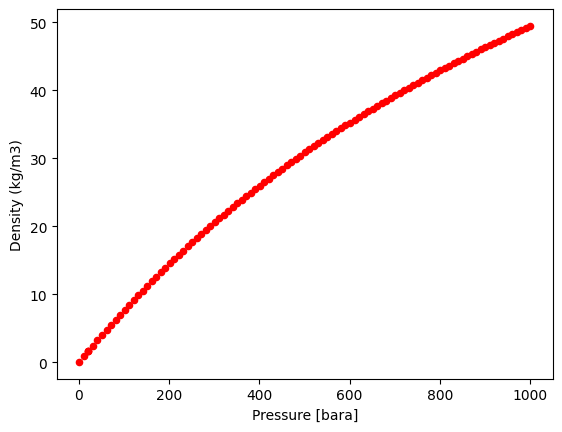

In [10]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='Pressure (bar)', y='Density (kg/m3)', kind='scatter',ylabel='Density (kg/m3)', xlabel='Pressure [bara]',color='red')

plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

<Figure size 640x480 with 0 Axes>

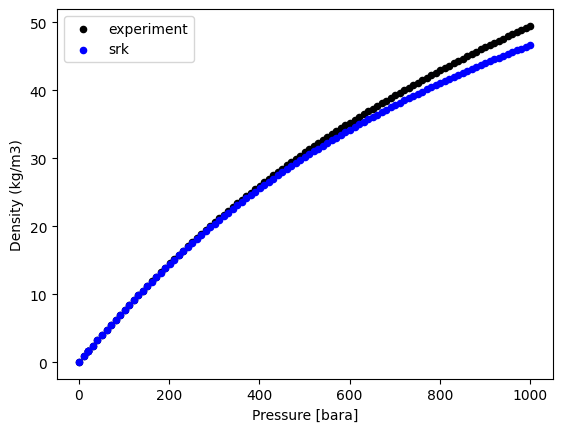

In [14]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('srk')
fluid1.addComponent('hydrogen', 1.0)

def dens(input):
    fluid1.setPressure(input[0], 'bara')
    fluid1.setTemperature(input[1], 'K')
    TPflash(fluid1)
    fluid1.initProperties()
    return fluid1.getDensity('kg/m3')

pressures = expdata_df['Pressure (bar)'].values.tolist()
temperatures = expdata_df['Temperature (K)'].values.tolist()
input = zip(pressures, temperatures)
dens_res = [dens(inp) for inp in input]

dataWithExperiment = expdata_df.assign(debs_res = dens_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='Pressure (bar)', y='Density (kg/m3)', kind='scatter',ylabel='Density (kg/m3)', xlabel='Pressure [bara]',color='black')	
dataWithExperiment.plot(ax=plot1, x='Pressure (bar)', y='debs_res', kind='scatter',ylabel='Density (kg/m3)', xlabel='Pressure [bara]',color='blue')	
plt.legend(['experiment', 'srk'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting